In [1]:
import os
import wandb
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import cv2

In [2]:
# Пути к изображениям и меткам датасета newdentiso1.v1i.

path_to_data_val_img = "newdentiso1.v1i.yolov5pytorch/valid/images/"

val_images_list = os.listdir(path_to_data_val_img)

path_to_data_val_lbl = "newdentiso1.v1i.yolov5pytorch/valid/labels/"

val_labels_list = os.listdir(path_to_data_val_lbl)

In [3]:
print(val_images_list[:5])
print()
print(val_labels_list[:5])

['-225-_jpg.rf.34dee51b8f1495c9a9e47c0a8de7dfb8.jpg', '-226-_jpg.rf.11fef6c629ede018f0255d89c74a001a.jpg', '-227-_jpg.rf.7638882ddd4a382c4cc556a5190b0433.jpg', '-229-_jpg.rf.5b6d7a9ee872f660a19677233b49bf77.jpg', '-231-_jpg.rf.e8af8c239e326ab92842c06b6c2e5150.jpg']

['-225-_jpg.rf.34dee51b8f1495c9a9e47c0a8de7dfb8.txt', '-226-_jpg.rf.11fef6c629ede018f0255d89c74a001a.txt', '-227-_jpg.rf.7638882ddd4a382c4cc556a5190b0433.txt', '-229-_jpg.rf.5b6d7a9ee872f660a19677233b49bf77.txt', '-231-_jpg.rf.e8af8c239e326ab92842c06b6c2e5150.txt']


In [4]:
# Функция для выбора класса по кариесу и перевода координат из COCO формата в человеческий. 
def compute_coordinates(file_name, file_name_image):
    
    coordinates_list = []
    im = Image.open(path_to_data_val_img + file_name_image)
    image_width, image_height = im.size

    with open(file_name, "r") as file:
        
        # итерация по строкам текстового файла
        for line in file:
            coordinates = line.strip().split()
            if coordinates[0] == "0":
                coordinates = coordinates[1:]
                coordinates[0] = float(coordinates[0])*image_width
                coordinates[1] = float(coordinates[1])*image_height
                coordinates[2] = float(coordinates[2])*image_width
                coordinates[3] = float(coordinates[3])*image_height
                
                
                coordinates[0] = coordinates[0] - coordinates[2]/2
                coordinates[1] = coordinates[1] - coordinates[3]/2
            
                print(coordinates)
                coordinates_list.append(coordinates)
            
    file.close       
    
    return coordinates_list


# Функция для отрисовки баундинг боксов на изображениях. Нам нужно сделать наложение чтобы посмотреть качество разметки.
def draw_bbox(image_fullname, image_name, coord):
    
    im = Image.open(image_fullname)
    img = cv2.imread(image_fullname,1) 

    if len(coord) != 0:
               
        fig, ax = plt.subplots()
        ax.imshow(im)

        for box in coord:
            rect = patches.Rectangle((box[0], box[1]), box[2], box[3], linewidth=1, edgecolor='r', facecolor='none')
            cv2.rectangle(img, (int(box[0]), int(box[1])), ( int(box[0] + box[2]), int(box[1] + box[3])), (0, 0, 255), 2) 
            ax.add_patch(rect)
            
        cv2.imwrite("out_valid_newdentiso1.v1i/" + image_name, img)
        plt.show()
    
    else:
        pass          

[80.5, 212.25, 89.0, 97.5]
[162.0, 187.5, 96.0, 115.0]
[261.75, 174.0, 86.5, 87.0]
[348.0, 104.25, 222.0, 191.5]


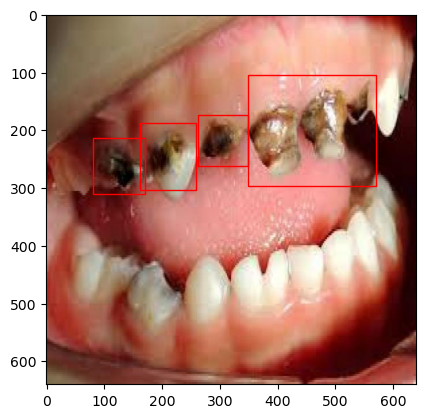

[71.5, 565.25, 435.0, 54.5]


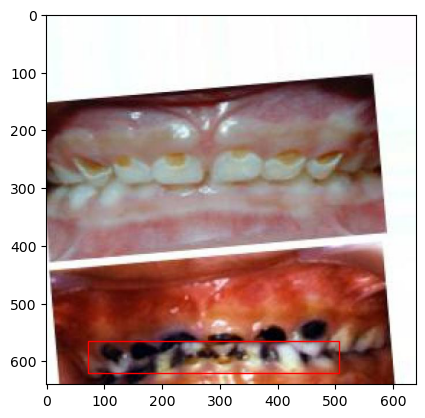

[16.5, 50.25, 572.0, 204.5]


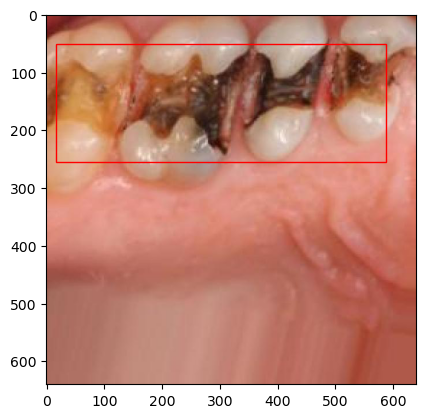

[146.5, 203.0, 74.0, 143.0]
[220.0, 208.5, 73.0, 167.0]
[343.5, 211.75, 47.0, 110.5]
[404.75, 231.0, 32.5, 87.0]


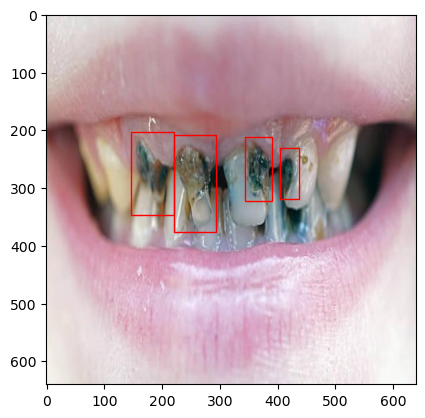

[228.0, 187.25, 91.0, 86.5]
[194.0, 230.5, 64.0, 64.0]
[123.5, 290.0, 46.0, 39.0]
[95.25, 453.75, 33.5, 79.5]
[320.75, 198.75, 75.5, 61.5]
[429.25, 251.25, 33.5, 34.5]
[467.0, 300.75, 68.0, 72.5]
[103.25, 499.5, 53.5, 50.0]


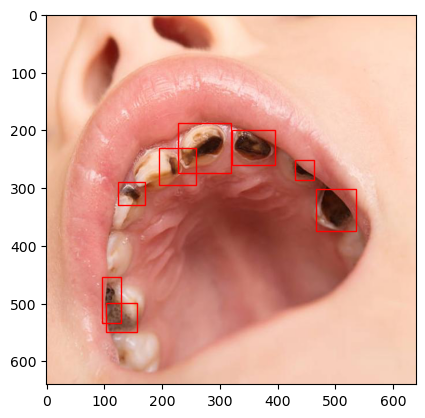

[78.75, 196.5, 81.5, 138.0]
[152.75, 169.75, 167.5, 175.5]
[321.0, 150.75, 109.0, 146.5]
[452.25, 144.25, 122.5, 146.5]


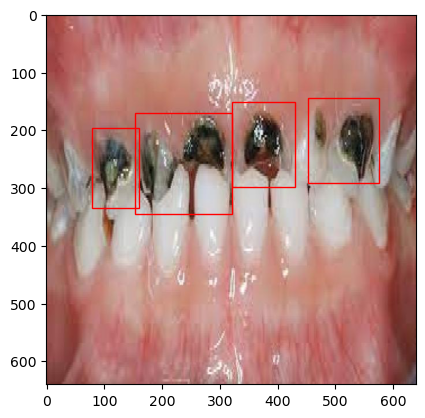

[105.25, 200.75, 75.5, 99.5]
[179.25, 188.5, 75.5, 114.0]
[257.25, 155.0, 82.5, 110.0]
[354.5, 133.5, 80.0, 110.0]
[429.75, 220.25, 29.5, 67.5]
[492.5, 188.25, 89.0, 85.5]
[511.0, 433.75, 80.0, 60.5]
[567.0, 300.5, 32.0, 71.0]


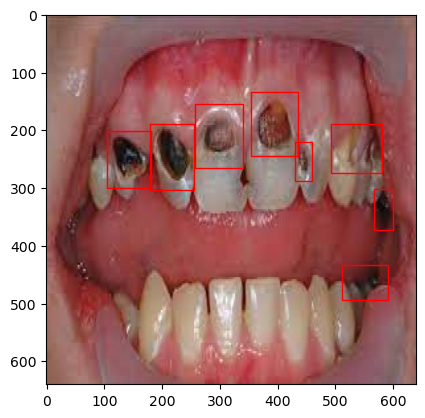

[239.75, 248.25, 111.5, 122.5]


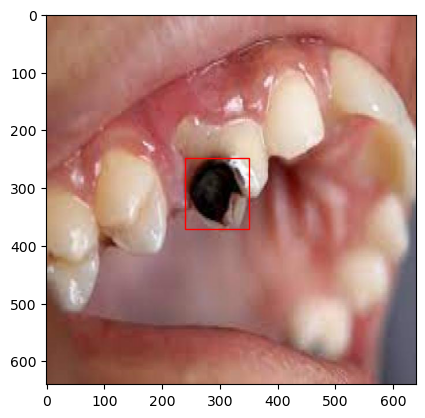

[220.75, 256.75, 60.5, 34.5]
[278.0, 267.5, 26.0, 36.0]


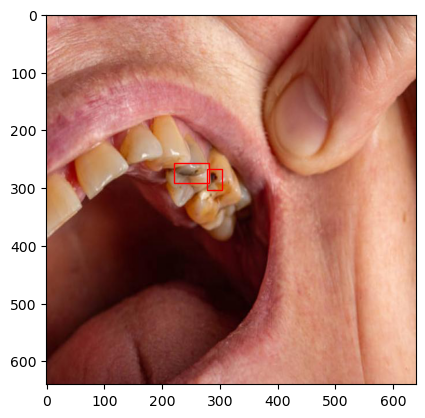

[221.5, 275.75, 79.0, 95.5]
[341.0, 296.75, 86.0, 69.5]
[437.0, 290.25, 79.0, 72.5]
[142.75, 275.5, 71.5, 66.0]


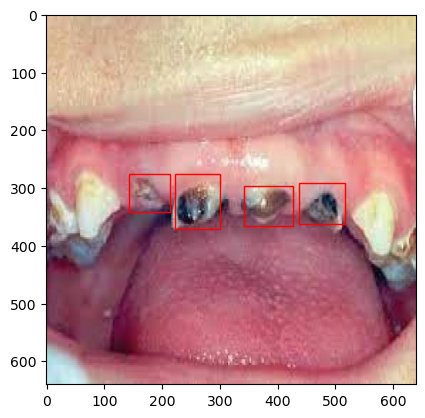

[101.25, 475.5, 19.5, 17.0]
[152.0, 450.25, 40.0, 36.5]
[210.25, 444.25, 54.5, 40.5]
[329.0, 424.5, 19.0, 52.0]
[362.5, 442.25, 19.0, 30.5]


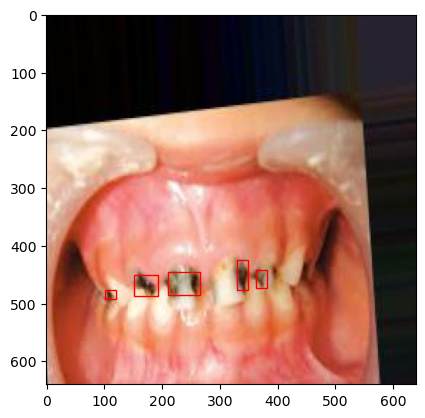

[119.0, 303.25, 54.0, 66.5]
[189.0, 300.75, 55.0, 49.5]
[316.5, 280.5, 32.0, 58.0]
[426.5, 368.0, 18.0, 35.0]
[362.0, 285.75, 28.0, 52.5]


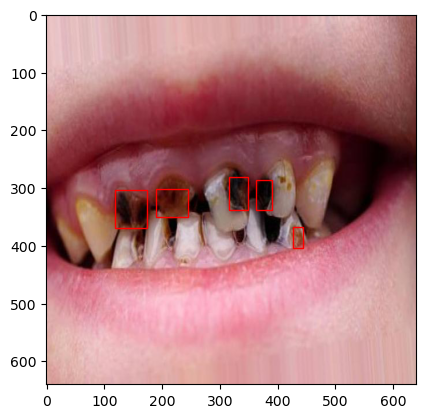

[317.25, 352.5, 10.5, 22.0]
[288.25, 194.5, 15.5, 19.0]


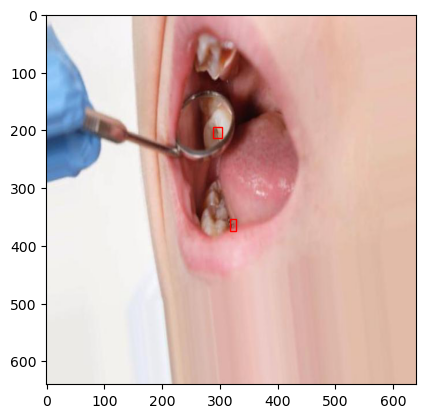

[315.25, 357.0, 58.5, 62.0]
[157.25, 510.5, 62.5, 65.0]
[314.75, 551.75, 50.5, 67.5]
[614.0, 458.0, 26.0, 56.0]


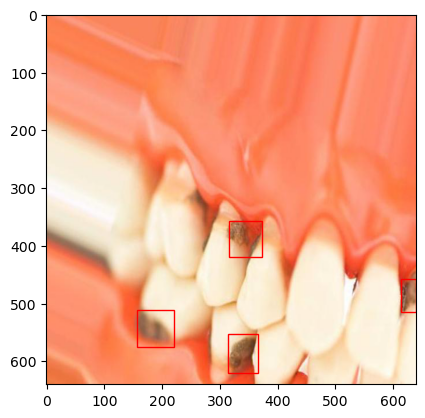

[420.75, 417.75, 31.5, 53.5]


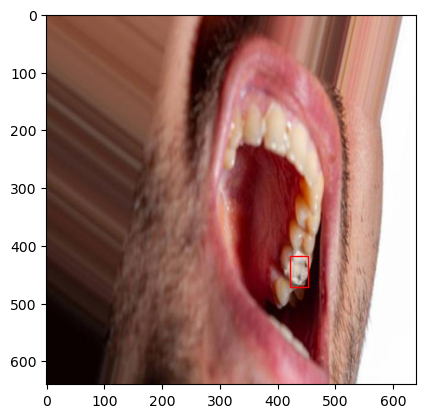

In [5]:
# Пройдемся по всем файлам с разметкой.
# Изображения могут иметь разный формат, это тоже учтём.

for file_name in val_labels_list:
    file_name_jpg = file_name[:file_name.find(".txt")] + ".jpg"
    file_name_jpeg = file_name[:file_name.find(".txt")] + ".jpeg"
    
    if file_name_jpg in val_images_list:        
        file_name_image = file_name_jpg
        
    elif file_name_jpeg in val_images_list:        
        file_name_image = file_name_jpeg
    
    else:
        file_name_image = ""
        
    if file_name_image != "":
        coordinates_list = compute_coordinates(path_to_data_val_lbl + file_name, file_name_image)

        draw_bbox(path_to_data_val_img + file_name_image, file_name_image, coordinates_list) 
        
    else:
        pass
    